In [1]:
import tensorflow as tf
from tensorflow.keras import backend as K
from keras.models import Sequential
from keras.layers import *
from keras.utils import *
from keras.optimizers import *
from keras.callbacks import *
from keras.metrics import *
from tensorflow.keras import initializers

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime

from collections import *
from sklearn.utils import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt

# Import data

In [4]:
### import the data
amazon_data = pd.read_csv("..//..//data preparation//4.amazon_twitter_data_aggregated_prices.csv")
amazon_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
0,2015-01-02,10,88,44.106540,3.825316,35,89,45,540,15.6290,15.4260,0.000000,0.0
1,2015-01-03,3,52,12.579978,3.455700,10,45,15,81,15.6290,15.4260,0.000000,0.0
2,2015-01-04,3,43,16.978333,4.842500,8,58,17,107,15.6290,15.4260,0.000000,0.0
3,2015-01-05,14,130,56.148954,22.619850,22,186,71,332,15.3505,15.1095,-2.051731,-1.0
4,2015-01-06,11,139,53.996380,16.087120,25,119,63,273,15.1120,14.7645,-2.283332,-1.0


In [5]:
amazon_data['date'] = pd.to_datetime(amazon_data['date'])
amazon_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target
0,2015-01-02,10,88,44.106540,3.825316,35,89,45,540,15.6290,15.4260,0.000000,0.0
1,2015-01-03,3,52,12.579978,3.455700,10,45,15,81,15.6290,15.4260,0.000000,0.0
2,2015-01-04,3,43,16.978333,4.842500,8,58,17,107,15.6290,15.4260,0.000000,0.0
3,2015-01-05,14,130,56.148954,22.619850,22,186,71,332,15.3505,15.1095,-2.051731,-1.0
4,2015-01-06,11,139,53.996380,16.087120,25,119,63,273,15.1120,14.7645,-2.283332,-1.0


## create target column of from close price : target_close

In [6]:
amazon_data['target_close'] = amazon_data['Close'].shift(-1)
amazon_data

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target,target_close
0,2015-01-02,10,88,44.106540,3.825316,35,89,45,540,15.629000,15.426000,0.000000,0.0,15.426000
1,2015-01-03,3,52,12.579978,3.455700,10,45,15,81,15.629000,15.426000,0.000000,0.0,15.426000
2,2015-01-04,3,43,16.978333,4.842500,8,58,17,107,15.629000,15.426000,0.000000,0.0,15.109500
3,2015-01-05,14,130,56.148954,22.619850,22,186,71,332,15.350500,15.109500,-2.051731,-1.0,14.764500
4,2015-01-06,11,139,53.996380,16.087120,25,119,63,273,15.112000,14.764500,-2.283332,-1.0,14.921000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1821,2019-12-28,144,1393,65.543312,21.729725,27,82,85,697,94.146004,93.489998,0.055115,1.0,93.489998
1822,2019-12-29,62,580,50.266318,18.140458,13,56,83,445,94.146004,93.489998,0.055115,1.0,92.344498
1823,2019-12-30,142,1334,168.356250,57.430292,62,211,243,771,93.699997,92.344498,-1.225265,-1.0,92.391998
1824,2019-12-31,160,1037,159.315592,51.076145,79,181,221,715,92.099998,92.391998,0.051438,1.0,92.391998


In [7]:
amazon_data = amazon_data.drop([1825])
amazon_data.head()

,date,comment_num,like_num,Subjuctivity,Polarity,Class_sentiment_negative,Class_sentiment_neutral,Class_sentiment_positive,total_count_tweet,Open,Close,change,Class_target,target_close
0,2015-01-02,10,88,44.106540,3.825316,35,89,45,540,15.6290,15.4260,0.000000,0.0,15.4260
1,2015-01-03,3,52,12.579978,3.455700,10,45,15,81,15.6290,15.4260,0.000000,0.0,15.4260
2,2015-01-04,3,43,16.978333,4.842500,8,58,17,107,15.6290,15.4260,0.000000,0.0,15.1095
3,2015-01-05,14,130,56.148954,22.619850,22,186,71,332,15.3505,15.1095,-2.051731,-1.0,14.7645
4,2015-01-06,11,139,53.996380,16.087120,25,119,63,273,15.1120,14.7645,-2.283332,-1.0,14.9210


In [8]:
amazon_data.columns

Index(['date', 'comment_num', 'like_num', 'Subjuctivity', 'Polarity',
       'Class_sentiment_negative', 'Class_sentiment_neutral',
       'Class_sentiment_positive', 'total_count_tweet', 'Open', 'Close',
       'change', 'Class_target', 'target_close'],
      dtype='object')

## correlation

In [10]:

### select the features to work on
Data = amazon_data.copy()
Data = Data[['date',
             'like_num',
             'comment_num',
             'Class_sentiment_negative', 'Class_sentiment_positive', 'Polarity',
             'total_count_tweet',
             'Close',
             'target_close'
            ]]

Data = Data.sort_values(['date'])
Data

,date,like_num,comment_num,Class_sentiment_negative,Class_sentiment_positive,Polarity,total_count_tweet,Close,target_close
0,2015-01-02,88,10,35,45,3.825316,540,15.426000,15.426000
1,2015-01-03,52,3,10,15,3.455700,81,15.426000,15.426000
2,2015-01-04,43,3,8,17,4.842500,107,15.426000,15.109500
3,2015-01-05,130,14,22,71,22.619850,332,15.109500,14.764500
4,2015-01-06,139,11,25,63,16.087120,273,14.764500,14.921000
...,...,...,...,...,...,...,...,...,...
1820,2019-12-27,3642,431,117,452,116.786030,1613,93.489998,93.489998
1821,2019-12-28,1393,144,27,85,21.729725,697,93.489998,93.489998
1822,2019-12-29,580,62,13,83,18.140458,445,93.489998,92.344498
1823,2019-12-30,1334,142,62,243,57.430292,771,92.344498,92.391998


Text(0.5, 1.0, 'The correlation between features')

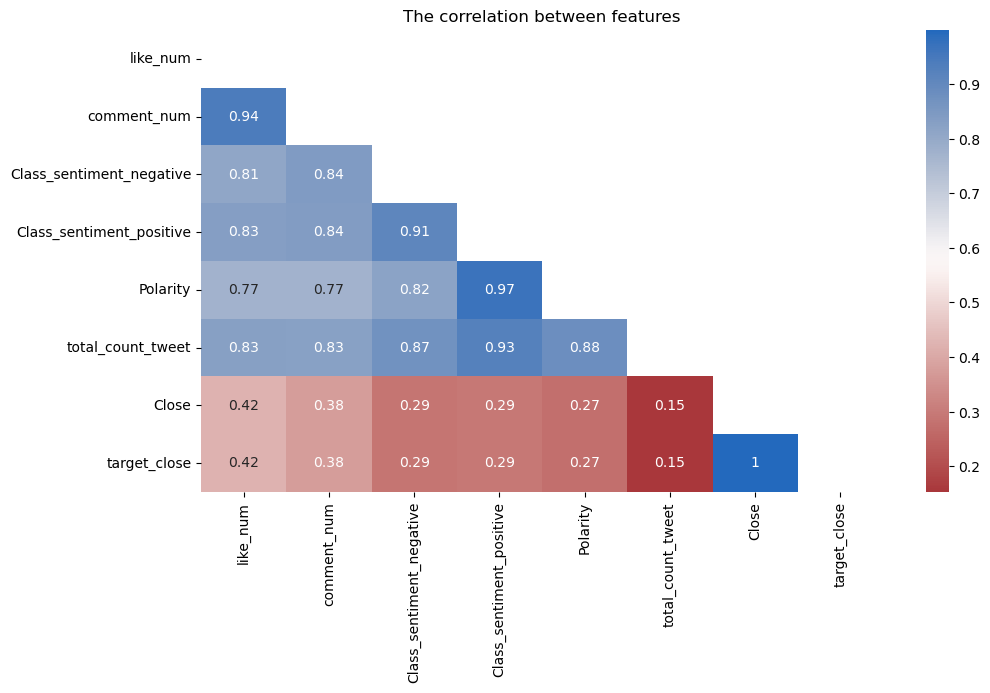

In [11]:
fig, ax = plt.subplots()
fig.set_size_inches(11, 6)
mask = np.triu(np.ones_like(Data.corr(), dtype=bool))
sns.heatmap(np.abs(Data.corr()), mask=mask, annot=True, cmap='vlag_r', ax=ax)
plt.title('The correlation between features')

In [12]:
# select features to use

In [13]:
### select the eatures to work on
Data = amazon_data.copy()
Data = Data[['date',
             'like_num',
             #'comment_num',
             'Class_sentiment_negative', 'Class_sentiment_positive', #'Polarity',
             'total_count_tweet',
             'Close',
             'target_close'
            ]]

Data = Data.sort_values(['date'])

## scaling and creating data sequence 

In [15]:
#Data[c] = (Data[c] - Data[c].min()) / (Data[c].max() - Data[c].min())
trg_min = Data['target_close'].min()
trg_max = Data['target_close'].max()
trg_min,trg_max

(14.3475, 101.975502)

In [16]:
#Scaling each column separately
for c in Data.columns[1:]:
    Data[c] = (Data[c] - Data[c].min()) / (Data[c].max() - Data[c].min())

In [17]:
WINDOW_SIZE = 1
data_x, data_y = [], []


for i in range(WINDOW_SIZE,len(Data)):
    data_x.append(Data.iloc[i-WINDOW_SIZE:i, 1:-1])
    data_y.append((Data.iloc[i, -1]))

In [18]:
data_x, data_y = np.array(data_x), np.array(data_y)

## spliting data

In [19]:
limiter = 8 * (data_x.shape[0] // 10)

trainV_data_x = data_x[:limiter, :, :]
trainV_data_y = data_y[:limiter]

test_data_x = data_x[limiter:, :, :]
test_data_y = data_y[limiter:]

In [20]:
limiterValid = 8 * (trainV_data_x.shape[0] // 10)

valid_data_x = trainV_data_x[limiterValid:, :, :]
valid_data_y = trainV_data_y[limiterValid:]

train_data_x = trainV_data_x[:limiterValid, :, :]
train_data_y = trainV_data_y[:limiterValid]

In [21]:
valid_data_x.shape,valid_data_y.shape

((296, 1, 5), (296,))

In [22]:
valid_data_y[:10]

array([0.73717308, 0.73717308, 0.73717308, 0.74829964, 0.74247382,
       0.74408296, 0.73913014, 0.73305905, 0.73305905, 0.73305905])

In [23]:
train_data_x.shape,train_data_y.shape

((1160, 1, 5), (1160,))

In [24]:
train_data_y[:10]

array([0.01230771, 0.00869585, 0.00475875, 0.00654471, 0.00770872,
       0.00569453, 0.00569453, 0.00569453, 0.00254485, 0.00444493])

In [25]:
test_data_x.shape,test_data_y.shape

((368, 1, 5), (368,))

In [26]:
test_data_y[:10]

array([0.67961724, 0.69328299, 0.69328299, 0.71448619, 0.69231865,
       0.73517597, 0.73517597, 0.73517597, 0.76605652, 0.78150249])

# Training

In [27]:
kernel_initializer=initializers.RandomNormal(stddev=0.01)
initializer = tf.keras.initializers.RandomUniform(minval=0., maxval=1.)

model = Sequential()


model.add(LSTM(units=60, activation='relu',
               input_shape=(int(train_data_x.shape[1]),int(train_data_x.shape[2])),
               return_sequences=True))

model.add(LSTM(units=35 ,return_sequences=False))
model.add(Dense(1))
model.add(Activation('relu'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 60)             15840     
                                                                 
 lstm_1 (LSTM)               (None, 35)                13440     
                                                                 
 dense (Dense)               (None, 1)                 36        
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 29,316
Trainable params: 29,316
Non-trainable params: 0
_________________________________________________________________


In [28]:
def r2(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred )) 
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) ) 
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

In [29]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=[r2])

In [30]:
history = model.fit(train_data_x, train_data_y, epochs=100, batch_size=48, validation_data=(valid_data_x, valid_data_y), verbose=1, callbacks=[
    ReduceLROnPlateau(monitor="val_r2", patience=15, factor=.1),
    EarlyStopping(monitor="val_loss", min_delta=1e-2, patience=45)
])

Epoch 1/100
25/25 [==============================] - 5s 52ms/step - loss: 0.0701 - r2: -2.0360 - val_loss: 0.4448 - val_r2: -330.0087 - lr: 0.0010
Epoch 2/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0271 - r2: -0.1861 - val_loss: 0.2010 - val_r2: -145.0045 - lr: 0.0010
Epoch 3/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0163 - r2: 0.1727 - val_loss: 0.1586 - val_r2: -114.3511 - lr: 0.0010
Epoch 4/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0127 - r2: 0.4560 - val_loss: 0.1186 - val_r2: -85.2482 - lr: 0.0010
Epoch 5/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0085 - r2: 0.6414 - val_loss: 0.0609 - val_r2: -43.3551 - lr: 0.0010
Epoch 6/100
25/25 [==============================] - 0s 7ms/step - loss: 0.0039 - r2: 0.8288 - val_loss: 0.0160 - val_r2: -10.8223 - lr: 0.0010
Epoch 7/100
25/25 [==============================] - 0s 7ms/step - loss: 9.8552e-04 - r2: 0.9584 - val_loss: 0.0024 - val_r2: -0.7

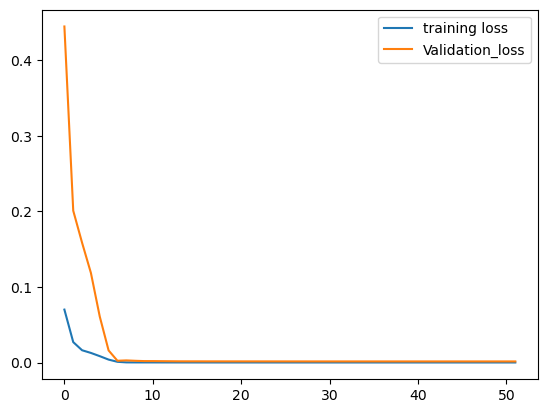

In [31]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='Validation_loss')
plt.legend()

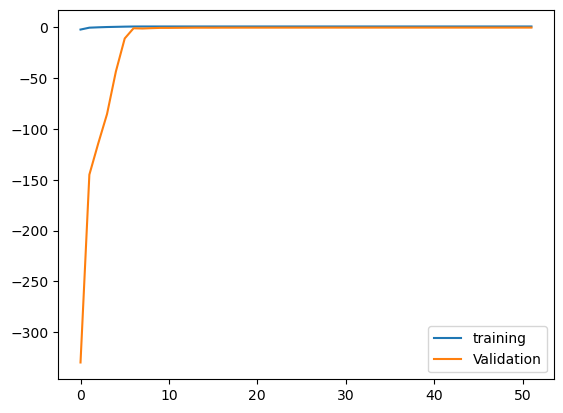

In [32]:
plt.plot(history.history['r2'], label='training')
plt.plot(history.history['val_r2'], label='Validation')
plt.legend()

In [33]:
predictions = model.predict(test_data_x)

12/12 [==============================] - 1s 2ms/step


In [34]:
Predictions = []
for i in range(len(predictions)):
    Predictions.append(predictions[i]*(trg_max-trg_min)+trg_min)

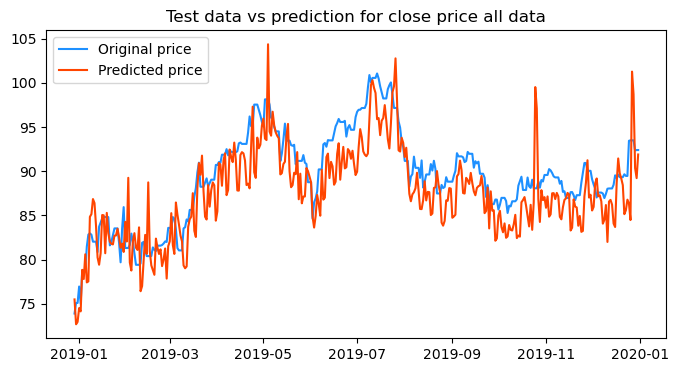

In [35]:
results = {'date' : amazon_data.date[limiter+WINDOW_SIZE:],
           'original': amazon_data.target_close[limiter+WINDOW_SIZE:],
          'predictions':Predictions
          }
df_results = pd.DataFrame(results) 
df_results.date = pd.to_datetime(df_results.date)
df_results.index = df_results.date

fig, ax = plt.subplots(figsize=(8,4))
ax.set_facecolor('#FFFFFF')
ax.plot(df_results['original'], color='dodgerblue', label='Original price')
plt.plot(df_results['predictions'], color='orangered', label='Predicted price')
plt.title('Test data vs prediction for close price all data')
plt.legend()

In [36]:
r2 = r2_score(df_results['original'], df_results['predictions'])
mse = mean_squared_error(df_results['original'], df_results['predictions'])
mae = mean_absolute_error(df_results['original'], df_results['predictions'])
rmse = np.sqrt(mse)
print('R2 score is -> ', r2)
print('RMSE is -> ', rmse)

R2 score is ->  0.5761157258766935
RMSE is ->  3.3900945742593662


In [37]:
df_results

,date,original,predictions
date,,,
2018-12-29,2018-12-29,73.901001,[75.49644]
2018-12-30,2018-12-30,75.098503,[72.68533]
2018-12-31,2018-12-31,75.098503,[72.95628]
2019-01-01,2019-01-01,76.956497,[74.51618]
2019-01-02,2019-01-02,75.014000,[74.140594]
...,...,...,...
2019-12-27,2019-12-27,93.489998,[101.26102]
2019-12-28,2019-12-28,93.489998,[98.69112]
2019-12-29,2019-12-29,92.344498,[90.35916]
